In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [92]:
ss=pd.read_csv('spaceserverdataset.csv')

In [93]:
ss

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [94]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


this suggest that there is no null values present in the data

In [95]:
ss.shape

(10000, 18)

In [96]:
ss.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [97]:
ss.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [98]:
ss.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Our target variable is class, hence it is a classification problem

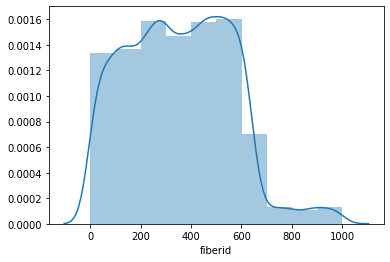

In [99]:
sns.distplot(ss['fiberid'],bins=10)

maximum fiberid falls in between 0 to 600

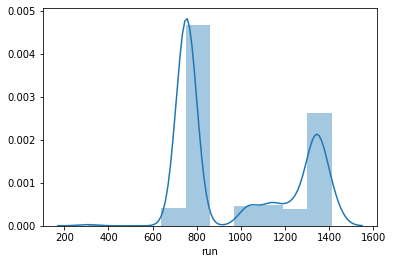

In [100]:
sns.distplot(ss['run'],bins=10)

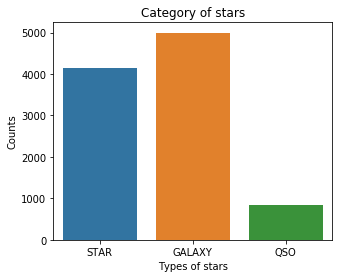

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [101]:
plt.figure(figsize=(5,4))
sns.countplot(x='class',data=ss)
plt.ylabel('Counts')
plt.xlabel('Types of stars')
plt.title('Category of stars')
plt.show()
print(ss['class'].value_counts())

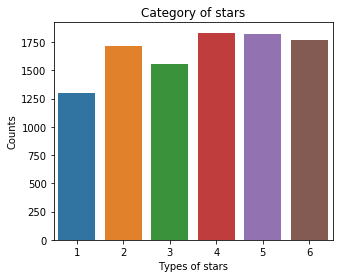

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [102]:
plt.figure(figsize=(5,4))
sns.countplot(x='camcol',data=ss)
plt.ylabel('Counts')
plt.xlabel('Types of stars')
plt.title('Category of stars')
plt.show()
print(ss['camcol'].value_counts())

here the graph shows about classification of stars, galaxy has highest count

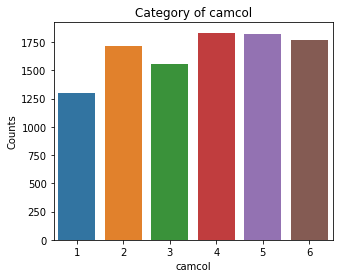

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [103]:
plt.figure(figsize=(5,4))
sns.countplot(x='camcol',data=ss)
plt.ylabel('Counts')
plt.xlabel('camcol')
plt.title('Category of camcol')
plt.show()
print(ss['camcol'].value_counts())

distribution of camcol 

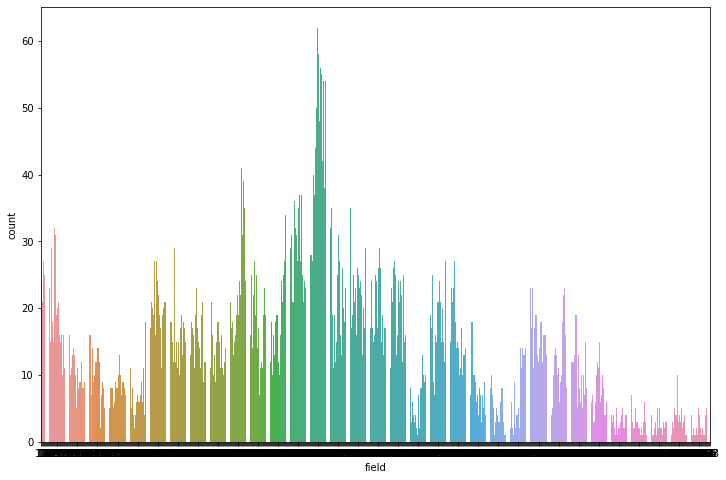

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(x='field',data=ss)


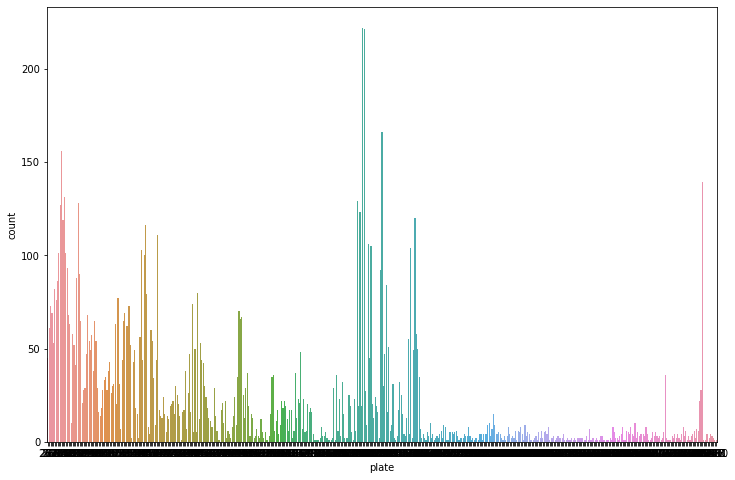

In [105]:
plt.figure(figsize=(12,8))
sns.countplot(x='plate',data=ss)


In [106]:
#bivariate analysis

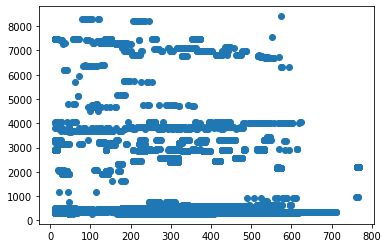

In [107]:
plt.scatter(ss['field'],ss['plate'])

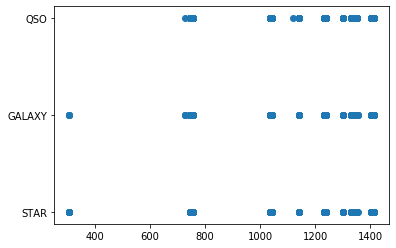

In [108]:
plt.scatter(ss['run'],ss['class'])

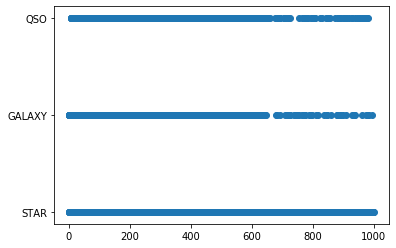

In [109]:
plt.scatter(ss['fiberid'],ss['class'])

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ss['class']=le.fit_transform(ss['class'])
ss['class']

0       2
1       2
2       0
3       2
4       2
       ..
9995    0
9996    0
9997    2
9998    0
9999    0
Name: class, Length: 10000, dtype: int32

In [111]:
ss

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


In [112]:
#multivariatenalysis

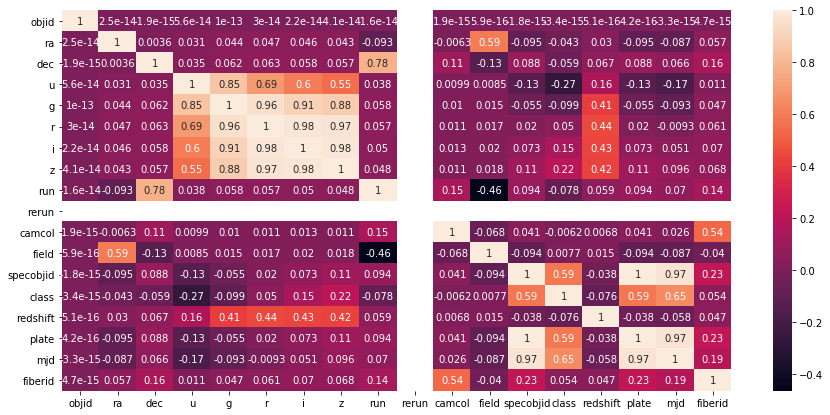

In [113]:
plt.figure(figsize=(15,7))
corr=ss.corr()
sns.heatmap(corr,annot=True)
plt.show()

hence run, camcol and field has very less correlation with target variable, so we will drop those.

In [114]:
ss.drop(['camcol','field','run'],axis=1,inplace=True)

In [115]:
ss

,objid,ra,dec,u,g,r,i,z,rerun,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,301,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,301,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,301,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,301,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,301,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,301,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,301,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,301,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,301,5.033400e+17,0,0.014019,447,51877,229


objid           AxesSubplot(0.125,0.657941;0.133621x0.222059)
ra           AxesSubplot(0.285345,0.657941;0.133621x0.222059)
dec           AxesSubplot(0.44569,0.657941;0.133621x0.222059)
u            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
g            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
r               AxesSubplot(0.125,0.391471;0.133621x0.222059)
i            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
z             AxesSubplot(0.44569,0.391471;0.133621x0.222059)
rerun        AxesSubplot(0.606034,0.391471;0.133621x0.222059)
specobjid    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
class              AxesSubplot(0.125,0.125;0.133621x0.222059)
redshift        AxesSubplot(0.285345,0.125;0.133621x0.222059)
plate            AxesSubplot(0.44569,0.125;0.133621x0.222059)
mjd             AxesSubplot(0.606034,0.125;0.133621x0.222059)
fiberid         AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

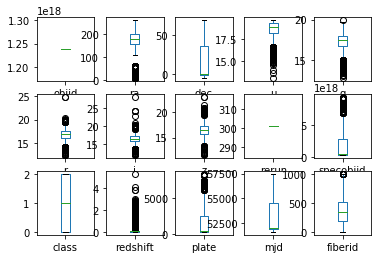

In [116]:
ss.plot(kind='box',subplots=True, layout=(3,5))

Its clear that outliers are present in the data, so we will remove it using zscore

In [117]:
from scipy.stats import zscore
z=np.abs(zscore(ss))
z

array([[       nan, 0.16745842, 0.58492272, ..., 1.03148936, 1.30931064,
        0.66863177],
       [       nan, 0.16886159, 0.58311429, ..., 0.63621258, 0.87919741,
        0.91101156],
       [       nan, 0.17057433, 0.58347525, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [       nan, 0.92039468, 1.46090664, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [       nan, 0.92197294, 1.46432109, ..., 0.56688806, 0.70581092,
        0.60143828],
       [       nan, 0.91804124, 1.46639319, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [118]:
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([11, 11, 11, ..., 12,  9, 12], dtype=int64))


In [119]:
ss_=ss[(z<3).all(axis=1)]

In [120]:
#Separating data into input and output variables

In [121]:
x=ss.drop(columns=['class'],axis=1)
x.head()

,objid,ra,dec,u,g,r,i,z,rerun,specobjid,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,301,3.722360e+18,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,301,3.638140e+17,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,301,3.232740e+17,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,301,3.722370e+18,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,301,3.722370e+18,0.000590,3306,54922,512


In [122]:
y=ss['class']
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [123]:
from sklearn.preprocessing import power_transform
ss=power_transform(x,method='yeo-johnson')


In [124]:
ss

array([[ 0.        ,  0.07408641, -0.29852842, ...,  1.32678164,
         1.33879117,  0.7081785 ],
       [ 0.        ,  0.07573554, -0.28696465, ..., -0.80680079,
        -0.92440343,  0.90966661],
       [ 0.        ,  0.07774912, -0.28924255, ..., -1.01795982,
        -0.62158161,  0.79763994],
       ...,
       [ 0.        , -1.06731453,  1.33754889, ...,  1.58529981,
         2.51820244,  1.22334937],
       [ 0.        , -1.06876571,  1.33853454, ..., -0.29912303,
        -0.71720956, -0.4947363 ],
       [ 0.        , -1.06514946,  1.33913207, ..., -0.29912303,
        -0.71720956, -0.47365745]])

In [125]:
#scaling the input data

In [126]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
z=sc.fit_transform(x)
z=pd.DataFrame(z,columns=x.columns)

In [127]:
x=z

In [128]:
x

,objid,ra,dec,u,g,r,i,z,rerun,specobjid,redshift,plate,mjd,fiberid
0,0.0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,0.0,1.031501,-0.369731,1.031489,1.309311,0.668632
1,0.0,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,0.0,-0.636183,-0.369849,-0.636213,-0.879197,0.911012
2,0.0,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,0.0,-0.656313,-0.053027,-0.656339,-0.609191,0.775279
3,0.0,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,0.0,1.031506,-0.369993,1.031489,1.309311,0.760736
4,0.0,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,0.0,1.031506,-0.368189,1.031489,1.309311,0.770431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-0.925337,1.455852,0.239453,0.104292,0.069416,0.087121,0.068876,0.0,-0.566899,-0.298756,-0.566888,-0.705811,-0.519029
9996,0.0,-0.925553,1.461079,-0.418536,0.070402,0.220993,0.116515,0.229516,0.0,-0.566901,-0.066761,-0.566888,-0.705811,-0.606286
9997,0.0,-0.920395,1.460907,0.167538,0.429347,0.634775,0.743983,0.829211,0.0,3.266103,-0.370741,3.266087,2.693094,1.303667
9998,0.0,-0.921973,1.464321,0.318018,0.569857,0.646764,0.682516,0.595986,0.0,-0.566901,-0.333647,-0.566888,-0.705811,-0.601438


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [130]:
print(x_train.shape,'\t',x_test.shape)

(7500, 14) 	 (2500, 14)


In [131]:
print(y_train.shape,'\t',y_test.shape)

(7500,) 	 (2500,)


In [132]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [133]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('score of' ,m,'is:',m.score(x_train,y_train))
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*************************************')
    print('\n')


score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 1.0
0.9832
[[1227   16    3]
 [  18  224    0]
 [   3    2 1007]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1246
           1       0.93      0.93      0.93       242
           2       1.00      1.00      1.00      1012

    accuracy                           0.98      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500

*************************************


score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='min

from the above model Decision tree is giving us the best results , so we will go with it.

In [138]:
from sklearn.model_selection import cross_val_score

In [141]:
models=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]

In [142]:
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('model:',m)
    print('Score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('*************************************')
    print('\n')


model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Score: [0.985 0.982 0.986 0.98  0.993 0.986 0.979 0.977 0.99  0.978]
mean score: 0.9836
standard deviation: 0.005043808085167401
*************************************


model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Score: [0.937 0.898 0.937 0.918 0.907 0.931 0.88  0.908 0.924 0.923]
mean score: 0.9163
standard deviation: 0.017286121600868152
*************************************


model: SVC(C=1.0, break_ties=False

In [143]:
# after cross validating the model there is a slight improvement in accuracy.

In [145]:
import pickle
filename='SpaceServer.pkl'
pickle.dump(DecisionTreeClassifier,open(filename, 'wb'))